### Import Packages

In [55]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [7]:
### Questions:


### Dataset

In [8]:
dataframe1= pd.read_excel("Data/nasa.xlsx")
dataframe2=pd.read_csv("Data/astronauts.csv")
dataframe3=pd.read_excel("Data/Female and Male Astronauts Accepted in the NASA Program.xlsx")

In [11]:
dataframe1.head()

,ID,DOB,Education,NASA,Military,Race,Gender,Interviewed,Selected,Status,rando,insamp,Announcement Date,Age
0,20090000,1984-11-22,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,0.176464,0,2009-06-29,24.599589
1,20090001,1984-07-16,6,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,0.760009,0,2009-06-29,24.952772
2,20090002,1984-02-09,4,No,No,Asian/Pacific Islander,Male,MBQ not interviewed,NaN,MBQ only,0.653344,0,2009-06-29,25.385352
3,20090003,1984-02-01,8,No,No,Asian/Pacific Islander,Male,MBQ not interviewed,NaN,MBQ only,0.510478,0,2009-06-29,25.407255
4,20090004,1984-01-20,4,No,No,Caucasian,Female,MBQ not interviewed,NaN,MBQ only,0.449820,0,2009-06-29,25.440110


In [12]:
dataframe2=pd.DataFrame(dataframe2)

In [13]:
dataframe2.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [14]:
dataframe3.head()

,ID,Cohort,Year,Males Accepted in NASA Program,Females Accepted in NASA Program
0,NaN,1,1959,100,0
1,NaN,2,1962,100,0
2,NaN,3,1963,100,0
3,NaN,4,1965,100,0
4,NaN,5,1966,100,0


In [15]:
dataframe1=pd.DataFrame(dataframe1)
dataframe3=pd.DataFrame(dataframe3)

## Remove extra columns to be able to combine into one data frame 

In [16]:
dataframe1=dataframe1.drop(columns=['ID','DOB','rando','Announcement Date','insamp'])

In [17]:
print(dataframe3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 0 non-null      float64
 1   Cohort                             27 non-null     int64  
 2   Year                               27 non-null     int64  
 3   Males Accepted in NASA Program     27 non-null     int64  
 4   Females Accepted in NASA Program   27 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.2 KB
None


In [18]:
dataframe2=dataframe2.drop(columns=['Group','Space Walks (hr)'])

In [19]:
NasaData=pd.merge(dataframe1,dataframe2, on='Gender')

In [20]:
NasaData.head()

,Education,NASA,Military,Race,Gender,Interviewed,Selected,Status_x,Age,Name,...,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Missions,Death Date,Death Mission
0,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,24.599589,Joseph M. Acaba,...,Geology,Geology,NaN,NaN,2,3307,2,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,24.599589,Loren W. Acton,...,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,STS 51-F (Challenger),NaN,NaN
2,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,24.599589,James C. Adamson,...,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,24.599589,Thomas D. Akers,...,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,24.599589,Buzz Aldrin,...,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,"Gemini 12, Apollo 11",NaN,NaN


In [21]:
NasaData=NasaData.drop(columns=['Interviewed','Status_x','Death Mission','Death Date','Alma Mater','Birth Place','Selected', 'Status_y'])

In [22]:
NasaData.head()

,Education,NASA,Military,Race,Gender,Age,Name,Year,Birth Date,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Missions
0,4,No,No,Caucasian,Male,24.599589,Joseph M. Acaba,2004.0,5/17/1967,Geology,Geology,NaN,NaN,2,3307,2,"STS-119 (Discovery), ISS-31/32 (Soyuz)"
1,4,No,No,Caucasian,Male,24.599589,Loren W. Acton,NaN,3/7/1936,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,STS 51-F (Challenger)
2,4,No,No,Caucasian,Male,24.599589,James C. Adamson,1984.0,3/3/1946,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,"STS-28 (Columbia), STS-43 (Atlantis)"
3,4,No,No,Caucasian,Male,24.599589,Thomas D. Akers,1987.0,5/20/1951,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ..."
4,4,No,No,Caucasian,Male,24.599589,Buzz Aldrin,1963.0,1/20/1930,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,"Gemini 12, Apollo 11"


#### Drop N/as

In [39]:
NasaData.dropna()

,Education,NASA,Military,Race,Gender,Age,Name,Year,Birth Date,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Missions,Space Flight (hr)SQRT
2,4,No,No,Caucasian,Male,24.599589,James C. Adamson,1984.0,3/3/1946,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,"STS-28 (Columbia), STS-43 (Atlantis)",18.275667
3,4,No,No,Caucasian,Male,24.599589,Thomas D. Akers,1987.0,5/20/1951,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",28.530685
4,4,No,No,Caucasian,Male,24.599589,Buzz Aldrin,1963.0,1/20/1930,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,"Gemini 12, Apollo 11",17.000000
5,4,No,No,Caucasian,Male,24.599589,Andrew M. Allen,1987.0,8/4/1955,Mechanical Engineering,Business Administration,Lieutenant Colonel,US Marine Corps (Retired),3,906,0,"STS-46 (Atlantis), STS-62 (Columbia), STS-75 (...",30.099834
7,4,No,No,Caucasian,Male,24.599589,Scott D. Altman,1995.0,8/15/1959,Aeronautical & Astronautical Engineering,Aeronautical Engineering,Captain,US Navy (Retired),4,1236,0,"STS-90 (Columbia), STS-106 (Atlantis), STS-109...",35.156792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714168,4,No,No,Caucasian,Female,66.729637,Susan L. Kilrain (Still),1995.0,10/24/1961,Astronautical Engineering,Aerospace Engineering,Commander,US Navy (Retired),2,472,0,"STS-83 (Columbia), STS-94 (Columbia)",21.725561
714169,4,No,No,Caucasian,Female,66.729637,Wendy B. Lawrence,1992.0,7/2/1959,Ocean Engineering,Ocean Engineering,Captain,US Navy (Retired),4,1223,0,"STS-67 (Endeavor), STS-86 (Atlantis), STS-91 (...",34.971417
714174,4,No,No,Caucasian,Female,66.729637,Pamela A. Melroy,1995.0,9/17/1961,Physics & Astronomy,Earth & Planetary Sciences,Colonel,US Air Force (Retired),3,914,0,"STS-92 (Discovery), STS-112 (Atlantis), STS-12...",30.232433
714177,4,No,No,Caucasian,Female,66.729637,Lisa M. Nowak,1996.0,5/10/1963,Aerospace Engineering,Aeronautical Engineering,Captain,US Navy (Retired),1,306,0,STS-121 (Discovery),17.492856


#### Does the space flight hours differ between males and females? (Independent t-test)

##### Test for Assumptions

<AxesSubplot:>

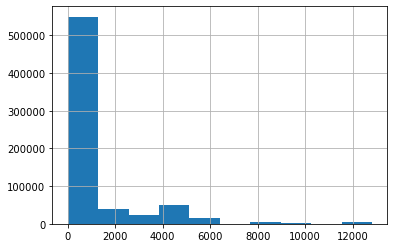

In [40]:
NasaData['Space Flight (hr)'][NasaData['Gender']== 'Male'].hist()

<AxesSubplot:xlabel='Space Flight (hr)', ylabel='Count'>

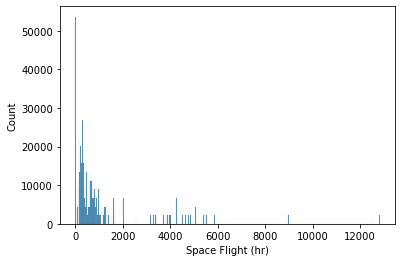

In [41]:
sns.histplot(NasaData['Space Flight (hr)'][NasaData['Gender']== 'Male'])

In [42]:
NasaData['Space Flight (hr)SQRT'] = np.sqrt(NasaData['Space Flight (hr)'])

<AxesSubplot:>

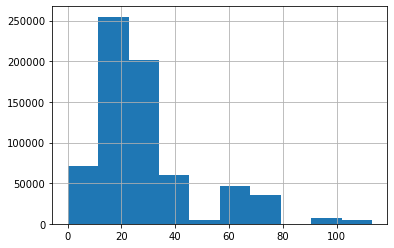

In [43]:
NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Male'].hist()

<AxesSubplot:>

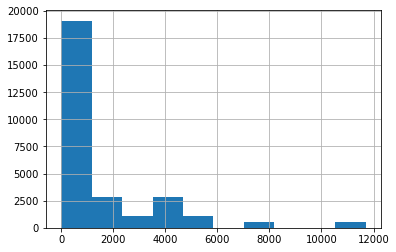

In [44]:
NasaData['Space Flight (hr)'][NasaData['Gender']== 'Female'].hist()

<AxesSubplot:>

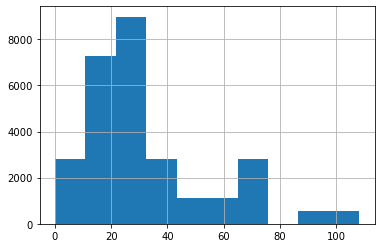

In [45]:
NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Female'].hist()

##### Run Analysis

In [46]:
ttest_ind(NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Male'],NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Female'])

Ttest_indResult(statistic=-33.397001497696905, pvalue=2.3432743505986788e-244)

In [47]:
NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Male'].mean()

28.121857019875563

In [48]:
NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Female'].mean()

32.24233522528614

#### There is a significance in the space flight time between males and females, females have more space flight time which is intresting

#### Does the space flight hours differ between hispanics and caucasians? (Independent t-test)

<AxesSubplot:>

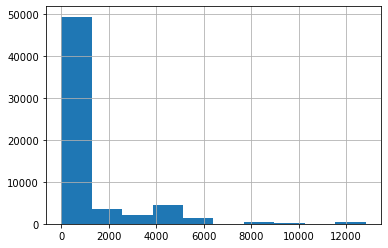

In [49]:
NasaData['Space Flight (hr)'][NasaData['Race']== 'Hispanic'].hist()

<AxesSubplot:>

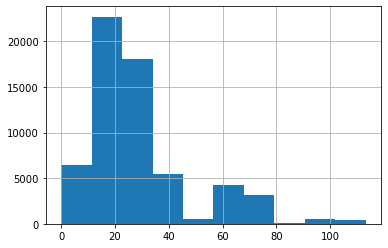

In [50]:
NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Hispanic'].hist()

<AxesSubplot:>

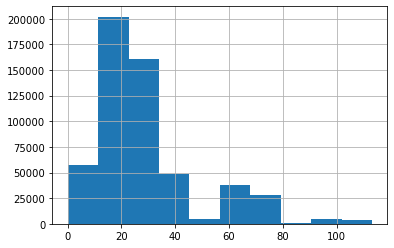

In [51]:
NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Caucasian'].hist()

In [52]:
ttest_ind(NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Hispanic'],NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Caucasian'])

Ttest_indResult(statistic=0.00073729398427902, pvalue=0.9994117248072004)

#### no significant difference

In [53]:
NasaData.Age.describe()

count    714195.000000
mean         38.158317
std           7.615960
min          24.599589
25%          32.114990
50%          37.284052
75%          42.995209
max          73.563313
Name: Age, dtype: float64

In [54]:
NasaData.mean()

/var/folders/bx/1smq66b51gs8lgsz5yj8vlr00000gn/T/ipykernel_34478/1680222627.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  NasaData.mean()


Education                   7.548762
Age                        38.158317
Year                     1984.252988
Space Flights               2.359944
Space Flight (hr)        1210.822212
Space Walks                 1.322265
Space Flight (hr)SQRT      28.283689
dtype: float64

#### Does the number of space flights differ between males and females? (Independent t-test)

##### Test for Assumptions

<AxesSubplot:>

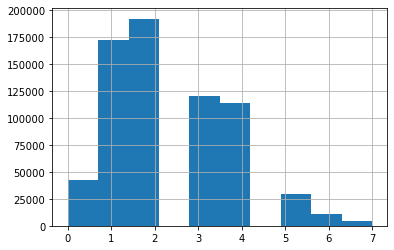

In [57]:
NasaData['Space Flights'][NasaData['Gender']== 'Male'].hist()

In [58]:
NasaData['Space FlightsSQRT'] = np.sqrt(NasaData['Space Flights'])

<AxesSubplot:>

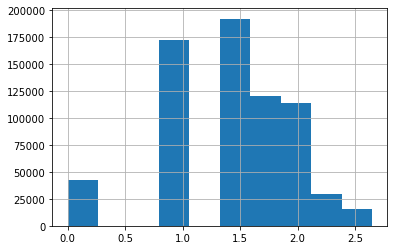

In [59]:
NasaData['Space FlightsSQRT'][NasaData['Gender']== 'Male'].hist()

<AxesSubplot:>

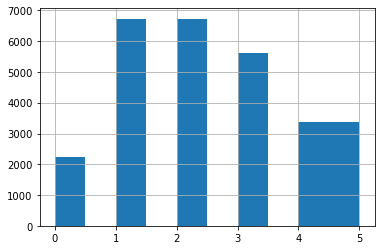

In [62]:
NasaData['Space Flights'][NasaData['Gender']== 'Female'].hist()

###### slightly skewed

<AxesSubplot:>

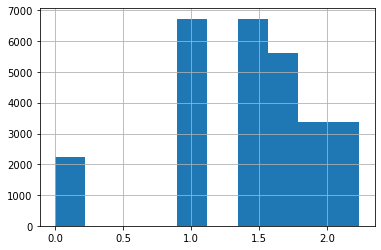

In [63]:
NasaData['Space FlightsSQRT'][NasaData['Gender']== 'Female'].hist()

In [64]:
ttest_ind(NasaData['Space FlightsSQRT'][NasaData['Gender']== 'Male'],NasaData['Space FlightsSQRT'][NasaData['Gender']== 'Female'])

Ttest_indResult(statistic=0.4665781874543454, pvalue=0.6408018382181488)

#### there is no significance